Visualization and summary stats: 

The summary statistics reveal substantial heterogeneity in telecom pricing across firms and regions. Andhra and Airtel exhibit the highest average daily prices, with Airtel also showing significant variation across circles (std ≈ 40), indicating differentiated regional pricing. In contrast, BSNL, MTNL, and Haryana display much lower average prices, suggesting a budget-oriented positioning. The coefficient of variation further confirms that BSNL and Airtel experience the greatest relative price dispersion, while Vi maintains relatively stable pricing across markets. Overall, pricing strategies appear to differ markedly between premium and low-cost providers.

In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

# --- paths ---
ROOT = Path.cwd().parent
PROCESSED_PATH = ROOT / "data" / "processed"

# Load final aggregated file
df_price_long = pd.read_excel(
    PROCESSED_PATH / "price_final_2023Q1.xlsx"
)

df_price_long.head()
df_price_long.shape


(36, 3)

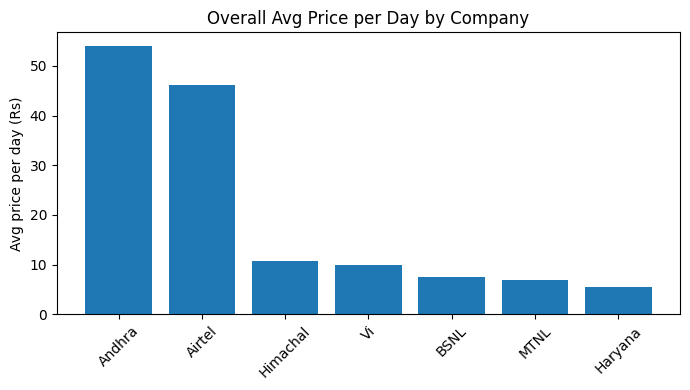

,count,mean,std,min,25%,50%,75%,max
company,,,,,,,,
Airtel,10.0,46.216988,40.069224,3.338095,8.471501,38.534994,79.946803,100.823257
Andhra,2.0,54.072146,0.000000,54.072146,54.072146,54.072146,54.072146,54.072146
BSNL,17.0,7.596256,8.838611,4.381314,5.136495,5.258954,5.734822,41.771570
Haryana,2.0,5.543155,0.000000,5.543155,5.543155,5.543155,5.543155,5.543155
Himachal,2.0,10.666284,0.000000,10.666284,10.666284,10.666284,10.666284,10.666284
MTNL,1.0,6.860095,NaN,6.860095,6.860095,6.860095,6.860095,6.860095
Vi,2.0,9.961088,1.005564,9.250047,9.605568,9.961088,10.316609,10.672129


In [7]:
company_avg = (
    df_price_long
    .groupby("company", as_index=False)["avg_price"]
    .mean()
    .sort_values("avg_price", ascending=False)
)

plt.figure(figsize=(7,4))
plt.bar(company_avg["company"], company_avg["avg_price"])
plt.xticks(rotation=45)
plt.ylabel("Avg price per day (Rs)")
plt.title("Overall Avg Price per Day by Company")
plt.tight_layout()
plt.show()

#Price by company to see which is most expensive
df_price_long.groupby("company")["avg_price"].describe()

In [6]:
df_price_long["avg_price"].describe()

count     36.000000
mean      21.073657
std       28.503841
min        3.338095
25%        5.246559
50%        6.326721
75%       15.553125
max      100.823257
Name: avg_price, dtype: float64

In [8]:
# Price by Circle: 
df_price_long.groupby("circle")["avg_price"].describe()


,count,mean,std,min,25%,50%,75%,max
circle,,,,,,,,
Andhra Pradesh,2.0,52.792851,67.925251,4.762445,28.777648,52.792851,76.808054,100.823257
Assam,1.0,5.136495,NaN,5.136495,5.136495,5.136495,5.136495,5.136495
Bihar Jharkhand,2.0,17.794784,17.538126,5.393456,11.594120,17.794784,23.995448,30.196112
Chennai,2.0,27.376885,27.572909,7.879894,17.628390,27.376885,37.125380,46.873876
Chhattisgarh,1.0,5.194591,NaN,5.194591,5.194591,5.194591,5.194591,5.194591
Delhi,1.0,100.342778,NaN,100.342778,100.342778,100.342778,100.342778,100.342778
Gujrat,1.0,74.733093,NaN,74.733093,74.733093,74.733093,74.733093,74.733093
Haryana,1.0,81.684707,NaN,81.684707,81.684707,81.684707,81.684707,81.684707
Himachal Pradesh,1.0,9.331847,NaN,9.331847,9.331847,9.331847,9.331847,9.331847


In [9]:
#Range Comparison 
summary = df_price_long.groupby("company")["avg_price"].agg(
    mean_price="mean",
    std_price="std",
    min_price="min",
    max_price="max"
).sort_values("mean_price", ascending=False)

summary


,mean_price,std_price,min_price,max_price
company,,,,
Andhra,54.072146,0.000000,54.072146,54.072146
Airtel,46.216988,40.069224,3.338095,100.823257
Himachal,10.666284,0.000000,10.666284,10.666284
Vi,9.961088,1.005564,9.250047,10.672129
BSNL,7.596256,8.838611,4.381314,41.771570
MTNL,6.860095,NaN,6.860095,6.860095
Haryana,5.543155,0.000000,5.543155,5.543155


In [11]:
# Price volatility across firms 
cv = df_price_long.groupby("company")["avg_price"].std() / \
     df_price_long.groupby("company")["avg_price"].mean()

cv


company
Airtel      0.866980
Andhra      0.000000
BSNL        1.163548
Haryana     0.000000
Himachal    0.000000
MTNL             NaN
Vi          0.100949
Name: avg_price, dtype: float64